<a href="https://colab.research.google.com/github/SahilSunda/ML_Project/blob/master/Crop_Detection_usingVGG-16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Khetipoint/Khetipoint Data/
directory_root = '/content/drive/My Drive/Khetipoint/Khetipoint Data/'

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Conv2D,BatchNormalization, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout, Activation
from keras.layers.merge import concatenate
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

In [ ]:
batch_size = 128
Image_dim = (224, 224, 3)

**Splitting Train and test data**

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2,
                                   preprocessing_function=tf.keras.applications.vgg16.preprocess_input)



In [ ]:

train_batch = train_datagen.flow_from_directory(directory=directory_root,
                                                target_size=(224,224),
                                                batch_size=128,
                                                class_mode = 'categorical',
                                                subset='training')      

valid_batch = train_datagen.flow_from_directory(directory=directory_root,
                                                target_size=(224,224),
                                                batch_size=128,
                                                class_mode = 'categorical',
                                                subset='validation')                                                                                                                                                                                                                                         

Found 5152 images belonging to 38 classes.
Found 1288 images belonging to 38 classes.


In [ ]:
class_dict = train_batch.class_indices
print(class_dict)

{'Bajara (Pearl millet) Fruit': 0, 'Bajara (Pearl millet) Leaf': 1, 'Bitter Guard Fruit': 2, 'Bitter Guard Leaf': 3, 'Black Gram Leaf': 4, 'Brinjal Fruit': 5, 'Brinjal Leaf': 6, 'Cabbage': 7, 'Cauliflower Leaf': 8, 'Chilli Fruit': 9, 'Chilli Leaf': 10, 'Cotton Leaf': 11, 'Cucumber Fruit': 12, 'Cucumber Leaf': 13, 'Cumin Leaf': 14, 'Garlic Leaf': 15, 'Gram Leaf': 16, 'Green Gram Leaf': 17, 'Groundnut Fruit': 18, 'Groundnut Leaf': 19, 'Maize Fruit': 20, 'Maize Leaf': 21, 'Okra': 22, 'Okra Leaf': 23, 'Onion Fruit': 24, 'Onion Leaf': 25, 'Paddy': 26, 'Pigeon Pea (Tur)': 27, 'Pointed Gaurd': 28, 'Potato': 29, 'Potato Leaf': 30, 'Sesame': 31, 'Sorghum': 32, 'Sugarcane': 33, 'Tomato Fruit': 34, 'Tomato Leaf': 35, 'Water Melon Fruit': 36, 'Water Melon Leaf': 37}


In [ ]:
li = list(class_dict.keys())
print(li)

['Bajara (Pearl millet) Fruit', 'Bajara (Pearl millet) Leaf', 'Bitter Guard Fruit', 'Bitter Guard Leaf', 'Black Gram Leaf', 'Brinjal Fruit', 'Brinjal Leaf', 'Cabbage', 'Cauliflower Leaf', 'Chilli Fruit', 'Chilli Leaf', 'Cotton Leaf', 'Cucumber Fruit', 'Cucumber Leaf', 'Cumin Leaf', 'Garlic Leaf', 'Gram Leaf', 'Green Gram Leaf', 'Groundnut Fruit', 'Groundnut Leaf', 'Maize Fruit', 'Maize Leaf', 'Okra', 'Okra Leaf', 'Onion Fruit', 'Onion Leaf', 'Paddy', 'Pigeon Pea (Tur)', 'Pointed Gaurd', 'Potato', 'Potato Leaf', 'Sesame', 'Sorghum', 'Sugarcane', 'Tomato Fruit', 'Tomato Leaf', 'Water Melon Fruit', 'Water Melon Leaf']


**Model** **Training**


In [ ]:
base_model=VGG16(weights='imagenet', include_top=False,input_shape=(224,224,3))
base_model.trainable=False

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(38,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 25088)             0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 38)                953382    
Total params: 15,668,070
Trainable params: 953,382
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
train_num = train_batch.samples
valid_num = valid_batch.samples

In [ ]:
history = model.fit(train_batch,
                    steps_per_epoch=train_num//batch_size,
                    validation_data=valid_batch,
                    epochs=25,
                    validation_steps=valid_num//batch_size,
                    verbose=1)

Epoch 1/25
40/40 [==============================] - 2089s 51s/step - loss: 3.0825 - accuracy: 0.1513 - val_loss: 2.4905 - val_accuracy: 0.3242
Epoch 2/25
40/40 [==============================] - 67s 2s/step - loss: 2.3361 - accuracy: 0.3543 - val_loss: 2.0123 - val_accuracy: 0.4609
Epoch 3/25
40/40 [==============================] - 68s 2s/step - loss: 1.9641 - accuracy: 0.4660 - val_loss: 1.7241 - val_accuracy: 0.5617
Epoch 4/25
40/40 [==============================] - 68s 2s/step - loss: 1.7098 - accuracy: 0.5510 - val_loss: 1.4870 - val_accuracy: 0.6266
Epoch 5/25
40/40 [==============================] - 68s 2s/step - loss: 1.5057 - accuracy: 0.6158 - val_loss: 1.3159 - val_accuracy: 0.6922
Epoch 6/25
40/40 [==============================] - 68s 2s/step - loss: 1.3398 - accuracy: 0.6835 - val_loss: 1.1781 - val_accuracy: 0.7383
Epoch 7/25
40/40 [==============================] - 68s 2s/step - loss: 1.2132 - accuracy: 0.7225 - val_loss: 1.0608 - val_accuracy: 0.7750
Epoch 8/25
40/40 

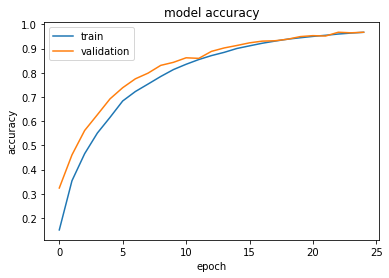

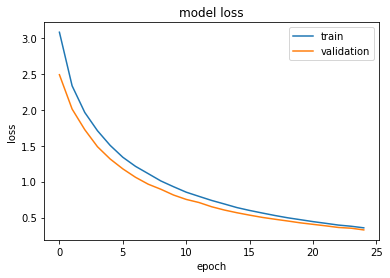

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel( 'epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()

In [ ]:
scores = model.evaluate(valid_batch)
print(f"Test Accuracy: {scores[1]*100}")

11/11 [==============================] - 16s 1s/step - loss: 0.3266 - accuracy: 0.9674
Test Accuracy: 96.7391312122345


Following is our prediction:


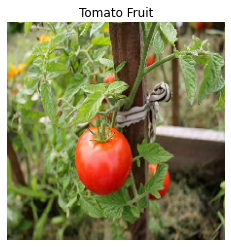

In [ ]:
from keras.preprocessing import image
image_path = '/content/drive/My Drive/Khetipoint/Test data/Tomato (4).jpeg'

new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)

d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()